In [13]:
import requests
import pandas as pd

In [14]:
base_currency = 'USD'
symbol = 'TUNGSTEN'
access_key = 'm29rswz853qlppfxspn1tprffref065jsc4ihybl7h7tzf7yo04yrvw34wqp'
endpoint = 'timeseries'
start_date = '2022-02-04'
end_date = '2022-04-26'
#time_call = 'https://www.metals-api.com/api/'+endpoint+'?access_key='+access_key+ '&start_date=' + start_date +'& end_date='+end_date+'&base='+base_currency+'&symbols='+symbol

In [15]:
resp=requests.get(
    'https://www.metals-api.com/api/'+endpoint+'?access_key='+access_key+ '&start_date=' + start_date +'& end_date='+end_date+'&base='+base_currency+'&symbols='+symbol).json()

if resp.status_code != 200:
        # This means something went wrong.
    raise ApiError('GET /'+endpoint+'/ {}'.format(resp.status_code))
print(resp.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [16]:
resp

{'success': False,
 'error': {'code': 104,
  'type': 'request_limit_reached',
  'info': 'The maximum allowed amount of monthly API requests has been reached.'}}

In [8]:
from pandas import json_normalize
import json

In [22]:
info= pd.DataFrame.from_dict(resp)

In [23]:
info

,success,timeseries,start_date,end_date,base,rates
2022-02-04,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 99.726985255814}"
2022-02-05,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 99.692093023256}"
2022-02-06,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 99.692093023256}"
2022-02-07,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 99.725988334884}"
2022-02-08,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 99.771846697674}"
...,...,...,...,...,...,...
2022-04-17,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 93.325689404935}"
2022-04-18,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 93.342488029028}"
2022-04-19,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 93.347154313498}"
2022-04-20,True,True,2022-02-04,2022-04-21,USD,"{'USD': 1, 'TUNGSTEN': 93.38915087373}"


In [24]:
type(info)

pandas.core.frame.DataFrame

In [25]:
info.columns

Index(['success', 'timeseries', 'start_date', 'end_date', 'base', 'rates'], dtype='object')

In [26]:
info.drop(['success','timeseries', 'start_date','end_date', 'base'], axis=1, inplace=True)

In [27]:
info.index.name='Date'

In [28]:
info

,rates
Date,
2022-02-04,"{'USD': 1, 'TUNGSTEN': 99.726985255814}"
2022-02-05,"{'USD': 1, 'TUNGSTEN': 99.692093023256}"
2022-02-06,"{'USD': 1, 'TUNGSTEN': 99.692093023256}"
2022-02-07,"{'USD': 1, 'TUNGSTEN': 99.725988334884}"
2022-02-08,"{'USD': 1, 'TUNGSTEN': 99.771846697674}"
...,...
2022-04-17,"{'USD': 1, 'TUNGSTEN': 93.325689404935}"
2022-04-18,"{'USD': 1, 'TUNGSTEN': 93.342488029028}"
2022-04-19,"{'USD': 1, 'TUNGSTEN': 93.347154313498}"


In [29]:
info=info.rates.apply(pd.Series)

In [30]:
info

,USD,TUNGSTEN
Date,,
2022-02-04,1.0,99.726985
2022-02-05,1.0,99.692093
2022-02-06,1.0,99.692093
2022-02-07,1.0,99.725988
2022-02-08,1.0,99.771847
...,...,...
2022-04-17,1.0,93.325689
2022-04-18,1.0,93.342488
2022-04-19,1.0,93.347154


In [31]:
info.columns

Index(['USD', 'TUNGSTEN'], dtype='object')

In [32]:
info.drop('USD', axis=1, inplace=True)
info

,TUNGSTEN
Date,
2022-02-04,99.726985
2022-02-05,99.692093
2022-02-06,99.692093
2022-02-07,99.725988
2022-02-08,99.771847
...,...
2022-04-17,93.325689
2022-04-18,93.342488
2022-04-19,93.347154


In [33]:
info['Tungsten Price']= (1/info['TUNGSTEN'])*32151
info

,TUNGSTEN,Tungsten Price
Date,,
2022-02-04,99.726985,322.390173
2022-02-05,99.692093,322.503009
2022-02-06,99.692093,322.503009
2022-02-07,99.725988,322.393396
2022-02-08,99.771847,322.245213
...,...,...
2022-04-17,93.325689,344.503215
2022-04-18,93.342488,344.441215
2022-04-19,93.347154,344.423997


In [34]:
info.drop('TUNGSTEN',axis=1, inplace=True)

In [35]:
info

,Tungsten Price
Date,
2022-02-04,322.390173
2022-02-05,322.503009
2022-02-06,322.503009
2022-02-07,322.393396
2022-02-08,322.245213
...,...
2022-04-17,344.503215
2022-04-18,344.441215
2022-04-19,344.423997


In [17]:
base_currency = 'USD'
symbols = 'ALU,TUNGSTEN,TIN,IRON,XCU'  
endpoint = 'latest'
access_key = 'kw1gi2e747957w1xqebd3ok2hh7sgfljbt9q9f1y3hs37jxb2f9dcgh12xu4'

resp5 = requests.get(
        'https://www.metals-api.com/api/'+endpoint+'?access_key='+access_key+'&base='+base_currency+'&symbols='+symbols)
if resp5.status_code != 200:
        # This means something went wrong.
    raise ApiError('GET /'+endpoint+'/ {}'.format(resp5.status_code))
print(resp5.json())

{'success': False, 'error': {'code': 104, 'type': 'request_limit_reached', 'info': 'The maximum allowed amount of monthly API requests has been reached.'}}


In [18]:
print(resp5.json())

{'success': False, 'error': {'code': 104, 'type': 'request_limit_reached', 'info': 'The maximum allowed amount of monthly API requests has been reached.'}}


In [38]:
type(resp5)

requests.models.Response

In [39]:
import json

In [40]:
json_data = json.loads(resp5.text)
json_data

{'success': True,
 'timestamp': 1650996060,
 'date': '2022-04-26',
 'base': 'USD',
 'rates': {'ALU': 10.394353490938,
  'IRON': 210.96025775562,
  'TIN': 0.81733480797023,
  'TUNGSTEN': 94.750338353461,
  'USD': 1,
  'XCU': 3.5976629213483},
 'unit': 'per ounce'}

In [41]:
info2=pd.DataFrame.from_dict(json_data)

In [42]:
type(json_data)

dict

In [43]:
info2.index.name='Metal'
info2

,success,timestamp,date,base,rates,unit
Metal,,,,,,
ALU,True,1650996060,2022-04-26,USD,10.394353,per ounce
IRON,True,1650996060,2022-04-26,USD,210.960258,per ounce
TIN,True,1650996060,2022-04-26,USD,0.817335,per ounce
TUNGSTEN,True,1650996060,2022-04-26,USD,94.750338,per ounce
USD,True,1650996060,2022-04-26,USD,1.000000,per ounce
XCU,True,1650996060,2022-04-26,USD,3.597663,per ounce


In [44]:
info2.drop(['success', 'timestamp', 'base'], axis=1, inplace=True)

In [45]:
info2

,date,rates,unit
Metal,,,
ALU,2022-04-26,10.394353,per ounce
IRON,2022-04-26,210.960258,per ounce
TIN,2022-04-26,0.817335,per ounce
TUNGSTEN,2022-04-26,94.750338,per ounce
USD,2022-04-26,1.000000,per ounce
XCU,2022-04-26,3.597663,per ounce


In [46]:
tonne_troy=32151 

In [47]:
info2.rename(columns={'rates':'Price','date':'Date'})

,Date,Price,unit
Metal,,,
ALU,2022-04-26,10.394353,per ounce
IRON,2022-04-26,210.960258,per ounce
TIN,2022-04-26,0.817335,per ounce
TUNGSTEN,2022-04-26,94.750338,per ounce
USD,2022-04-26,1.000000,per ounce
XCU,2022-04-26,3.597663,per ounce


In [77]:
info2.columns

Index(['date', 'rates', 'unit'], dtype='object')

In [48]:
info2['USD per tonne']=((1/info2.rates)*tonne_troy)


In [49]:
info2

,date,rates,unit,USD per tonne
Metal,,,,
ALU,2022-04-26,10.394353,per ounce,3093.121667
IRON,2022-04-26,210.960258,per ounce,152.403113
TIN,2022-04-26,0.817335,per ounce,39336.389062
TUNGSTEN,2022-04-26,94.750338,per ounce,339.323327
USD,2022-04-26,1.000000,per ounce,32151.000000
XCU,2022-04-26,3.597663,per ounce,8936.634894


In [50]:
info2=info2.rename(columns={'rates':'Price','date':'Date'})

In [51]:
info2

,Date,Price,unit,USD per tonne
Metal,,,,
ALU,2022-04-26,10.394353,per ounce,3093.121667
IRON,2022-04-26,210.960258,per ounce,152.403113
TIN,2022-04-26,0.817335,per ounce,39336.389062
TUNGSTEN,2022-04-26,94.750338,per ounce,339.323327
USD,2022-04-26,1.000000,per ounce,32151.000000
XCU,2022-04-26,3.597663,per ounce,8936.634894


In [52]:
info2.drop(['Price','unit'], axis=1, inplace=True)

In [53]:
info2

,Date,USD per tonne
Metal,,
ALU,2022-04-26,3093.121667
IRON,2022-04-26,152.403113
TIN,2022-04-26,39336.389062
TUNGSTEN,2022-04-26,339.323327
USD,2022-04-26,32151.000000
XCU,2022-04-26,8936.634894


In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

<AxesSubplot:xlabel='Date'>

<Figure size 1728x7200 with 0 Axes>

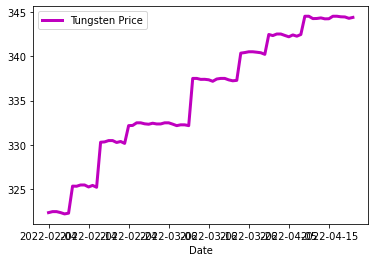

In [69]:
fig = plt.figure(figsize=(24, 100))
info.plot(color='m',label='Tungsten Price', linewidth=3)